# Used Car Price Prediction: Stocastic Regressor

### Load Dataset

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [122]:
cars_df = pd.read_csv( "new_used_car_v1.csv" )

In [123]:
cars_df.sample(5)

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
2451,4797,Hyundai i20 1.2 Asta,Chennai,2011,47000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0,NaN,4.50,8,47,hyundai,17.00,1197.0,80.00
2998,5833,Ford EcoSport 1.5 TDCi Trend,Delhi,2015,57000,Diesel,Manual,First,22.77 kmpl,1498 CC,98.59 bhp,5.0,NaN,6.35,4,57,ford,22.77,1498.0,98.59
2683,5238,Chevrolet Sail 1.2 LS,Jaipur,2013,48000,Petrol,Manual,First,18.2 kmpl,1199 CC,82.4 bhp,5.0,NaN,3.25,6,48,chevrolet,18.20,1199.0,82.40
578,1165,Maruti Swift VXI BSIII,Ahmedabad,2008,65000,Petrol,Manual,First,16.1 kmpl,1298 CC,88.2 bhp,5.0,NaN,2.71,11,65,maruti,16.10,1298.0,88.20
1173,2344,Maruti Baleno Zeta Automatic,Kochi,2017,36152,Petrol,Automatic,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,NaN,7.22,2,36,maruti,21.40,1197.0,83.10


In [124]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
 14  age                3092 non-null   int64  
 15  KM_Driven          3092 non-null   int64  
 16  make               3092 

### Feature Set Selection

In [125]:
cars_df.columns

Index(['index', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'KM_Driven', 'make', 'mileage_new',
       'engine_new', 'power_new'],
      dtype='object')

In [126]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [127]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [128]:
num_features = list(set(x_features) - set(cat_features))

In [129]:
num_features

['power_new', 'mileage_new', 'engine_new', 'Seats', 'KM_Driven', 'age']

In [130]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   float64
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [131]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [132]:
cars_df.shape

(3091, 12)

In [133]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
187,68,Diesel,9,Manual,Second,5.0,maruti,21.10,1248.0,73.9,Hyderabad,3.2
1625,69,Diesel,6,Manual,First,5.0,nissan,23.08,1461.0,63.1,Mumbai,3.0
1120,65,Petrol,9,Manual,First,5.0,volkswagen,16.47,1198.0,73.9,Delhi,2.4
2937,73,Diesel,7,Manual,Second,5.0,ford,20.00,1399.0,68.0,Hyderabad,2.6
727,32,Diesel,7,Manual,First,5.0,nissan,23.08,1461.0,63.1,Kolkata,2.4


### Setting X and y variables

In [134]:
X = cars_df[x_features]
y = cars_df['Price']

### Data Splitting

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [137]:
X_train

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
...,...,...,...,...,...,...,...,...,...,...,...
522,45,Diesel,5,Manual,First,5.0,maruti,23.40,1248.0,74.00,Kolkata
2260,16,Petrol,2,Manual,First,5.0,tata,23.84,1199.0,84.00,Hyderabad
2983,21,Petrol,4,Manual,First,5.0,hyundai,18.90,1197.0,82.00,Pune
1213,83,Petrol,12,Manual,First,5.0,maruti,14.00,1061.0,64.00,Pune


In [138]:
X_train[0:10]

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
737,12,Petrol,3,Manual,First,5.0,maruti,21.40,1197.0,83.10,Mumbai
265,50,Diesel,4,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
713,59,Petrol,12,Manual,First,4.0,maruti,16.10,796.0,37.00,Jaipur
82,88,Diesel,7,Manual,First,5.0,chevrolet,25.44,936.0,57.60,Jaipur
2918,27,Petrol,2,Manual,First,5.0,maruti,22.74,796.0,47.30,Kochi


In [139]:
X_test.shape

(619, 11)

### Encode Categorical Variables

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [142]:
ohe_encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore')

In [143]:
ohe_encoder.categories_

[array(['Diesel', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['chevrolet', 'datsun', 'fiat', 'ford', 'honda', 'hyundai',
        'mahindra', 'maruti', 'mitsubishi', 'nissan', 'renault', 'skoda',
        'tata', 'toyota', 'volkswagen'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object)]

In [144]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cat_names

['Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'make_chevrolet',
 'make_datsun',
 'make_fiat',
 'make_ford',
 'make_honda',
 'make_hyundai',
 'make_mahindra',
 'make_maruti',
 'make_mitsubishi',
 'make_nissan',
 'make_renault',
 'make_skoda',
 'make_tata',
 'make_toyota',
 'make_volkswagen',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [146]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [147]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('num', numeric_transformer, num_features),
        ('cat', ohe_encoder, cat_features)])

### Linear Models

Assumes linear relationship between features and outcome variable.

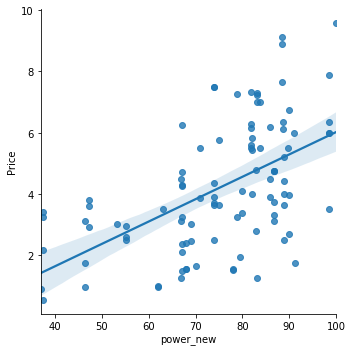

In [148]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [150]:
from sklearn.linear_model import SGDRegressor

In [181]:
lreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SGDRegressor(max_iter=100000, eta0=0.01))])

In [182]:
lreg_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['power_new', 'mileage_new',
                                                   'engine_new', 'Seats',
                                                   'KM_Driven', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', SGDRegressor(max_iter=100000))])

In [219]:
final_feature_names = num_features + list(lreg_v1['preprocessor'].transformers_[1][1].get_feature_names())

### Understanding model parameters

In [184]:
lreg_v1['regressor'].intercept_

array([0.02767005])

In [185]:
lreg_v1['regressor'].coef_

array([ 0.63113313, -0.07052376,  0.30618245,  0.07077989, -0.33253467,
       -1.09629479,  1.8476388 ,  0.90589976,  1.48431853,  1.26922003,
        1.07695789,  0.03801975,  0.90137438,  0.73718654, -0.28929003,
       -0.12887094, -0.08801285,  0.2533091 ,  0.2509968 ,  0.48886254,
       -0.25922113,  1.01161809,  0.09998289,  0.1200478 ,  0.34344752,
        0.07923063, -0.49129285,  0.93044656,  0.43228444,  0.16208108,
        0.61918957,  0.38091073,  1.09884817, -0.22451135,  0.6867953 ,
        0.1675811 ,  0.52266335, -0.84360509,  0.01079663,  0.17278907])

In [186]:
dict(zip(final_feature_names, np.round(lreg_v1['regressor'].coef_, 2)))

{'power_new': 0.63,
 'mileage_new': -0.07,
 'engine_new': 0.31,
 'Seats': 0.07,
 'KM_Driven': -0.33,
 'age': -1.1,
 'x0_Diesel': 1.85,
 'x0_Petrol': 0.91,
 'x1_Automatic': 1.48,
 'x1_Manual': 1.27,
 'x2_First': 1.08,
 'x2_Fourth & Above': 0.04,
 'x2_Second': 0.9,
 'x2_Third': 0.74,
 'x3_chevrolet': -0.29,
 'x3_datsun': -0.13,
 'x3_fiat': -0.09,
 'x3_ford': 0.25,
 'x3_honda': 0.25,
 'x3_hyundai': 0.49,
 'x3_mahindra': -0.26,
 'x3_maruti': 1.01,
 'x3_mitsubishi': 0.1,
 'x3_nissan': 0.12,
 'x3_renault': 0.34,
 'x3_skoda': 0.08,
 'x3_tata': -0.49,
 'x3_toyota': 0.93,
 'x3_volkswagen': 0.43,
 'x4_Ahmedabad': 0.16,
 'x4_Bangalore': 0.62,
 'x4_Chennai': 0.38,
 'x4_Coimbatore': 1.1,
 'x4_Delhi': -0.22,
 'x4_Hyderabad': 0.69,
 'x4_Jaipur': 0.17,
 'x4_Kochi': 0.52,
 'x4_Kolkata': -0.84,
 'x4_Mumbai': 0.01,
 'x4_Pune': 0.17}

### Predict on test set

In [187]:
y_pred = lreg_v1.predict(X_test)

In [188]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [189]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.134204,-1.095796
1540,6.43,5.414952,-1.015048
2962,6.25,5.841859,-0.408141
2040,4.69,5.361812,0.671812
640,2.65,2.743941,0.093941
81,8.35,6.420287,-1.929713
2773,6.75,5.873177,-0.876823
816,3.00,4.013839,1.013839
305,1.96,0.848888,-1.111112
2907,4.00,4.432587,0.432587


### Measuring Accuracy

In [190]:
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [192]:
mse_v1

0.9959454785655195

In [193]:
rmse_v1 = np.sqrt(mse_v1)

In [194]:
rmse_v1

0.9979706802133615

In [195]:
r2_score(y_test, y_pred)

0.7811021106018019

### K Fold Cross Validation

In [197]:
from sklearn.model_selection import cross_val_score

In [203]:
scores = cross_val_score( lreg_v1,
                          X_train,
                          y_train,
                          cv = 10,
                          scoring = 'r2')

In [204]:
scores

array([0.77043039, 0.74925518, 0.80766615, 0.76483588, 0.79057301,
       0.76097408, 0.77346862, 0.77164623, 0.81986899, 0.77410786])

In [205]:
scores.mean()

0.7782826362105142

In [206]:
scores.std()

0.02052599916708511

### Ridge Regression

In [208]:
# Importing Ridge Regression 
from sklearn.linear_model import Ridge


ridge = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge(alpha = 1, max_iter = 500))])


ridge.fit( X_train, y_train )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['power_new', 'mileage_new',
                                                   'engine_new', 'Seats',
                                                   'KM_Driven', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', Ridge(alpha=1, max_iter=500))])

In [209]:
y_pred_ridge = ridge.predict(X_test)

In [210]:
mse_v1 = mean_squared_error(y_test, y_pred_ridge)

In [211]:
mse_v1

0.9770326786157042

In [212]:
r2_score(y_test, y_pred_ridge)

0.7852589365332654

### Lasso Regression

In [214]:
# Importing Ridge Regression 
from sklearn.linear_model import Lasso


lasso = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Lasso(alpha = 0.01, max_iter = 500))])


lasso.fit( X_train, y_train )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['power_new', 'mileage_new',
                                                   'engine_new', 'Seats',
                                                   'KM_Driven', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', Lasso(alpha=0.01, max_iter=500))])

In [216]:
final_feature_names = num_features + list(lasso['preprocessor'].transformers_[1][1].get_feature_names())

In [238]:
lasso['regressor'].intercept_
lasso['regressor'].coef_
features_df = pd.DataFrame(dict(zip(final_feature_names,
                                               np.round(lasso['regressor'].coef_, 2))).items(),
                                     columns = ['feature', 'coefs'])

In [240]:
features_df[features_df.coefs != 0]

,feature,coefs
0,power_new,0.65
1,mileage_new,-0.02
2,engine_new,0.30
3,Seats,0.07
4,KM_Driven,-0.29
5,age,-1.12
6,x0_Diesel,0.80
8,x1_Automatic,0.10
12,x2_Second,-0.10
14,x3_chevrolet,-0.29


In [243]:
features_df[features_df.coefs == 0]

,feature,coefs
7,x0_Petrol,-0.0
9,x1_Manual,-0.0
10,x2_First,0.0
11,x2_Fourth & Above,-0.0
13,x2_Third,0.0
15,x3_datsun,-0.0
16,x3_fiat,-0.0
17,x3_ford,0.0
18,x3_honda,-0.0
20,x3_mahindra,-0.0


In [241]:
y_pred_lasso = lasso.predict(X_test)
mse_v1 = mean_squared_error(y_test, y_pred_lasso)
mse_v1

1.0400344951546956

In [242]:
r2_score(y_test, y_pred_lasso)

0.7714118284681721